# Modeling Wine Quality

## Overview

The Washington Winegrower's Association is would like to increase their performance in competitions. They have asked us to develop a model that can predict how well a wine can be expected to perform in competition based on it's chemical properties to help their wineries select wines to send to competition.

## Looking At Our Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red = pd.read_csv('wines/WineQuality-WhiteWine.csv')

Since we want to create a single model, we will need to put these dataframes together. However, we will want our model to account for differences between red wine and white wine. To manage this, we will add a 'red' column and a 'white' column to indicate this.

In [3]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

Then we stack the two datasets on top of each other to create our full dataset.

In [4]:
df = pd.concat([white, red], ignore_index = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


We've created a couple different visualizations to help see the relationships within our dataset.

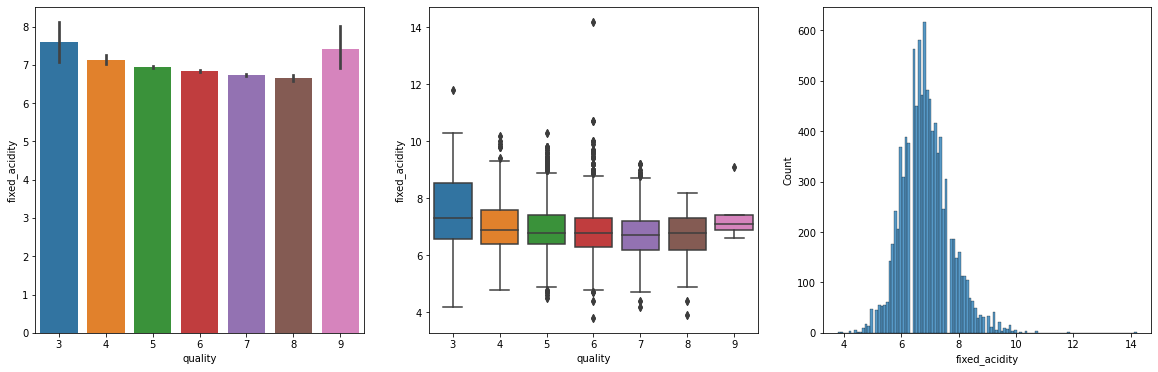

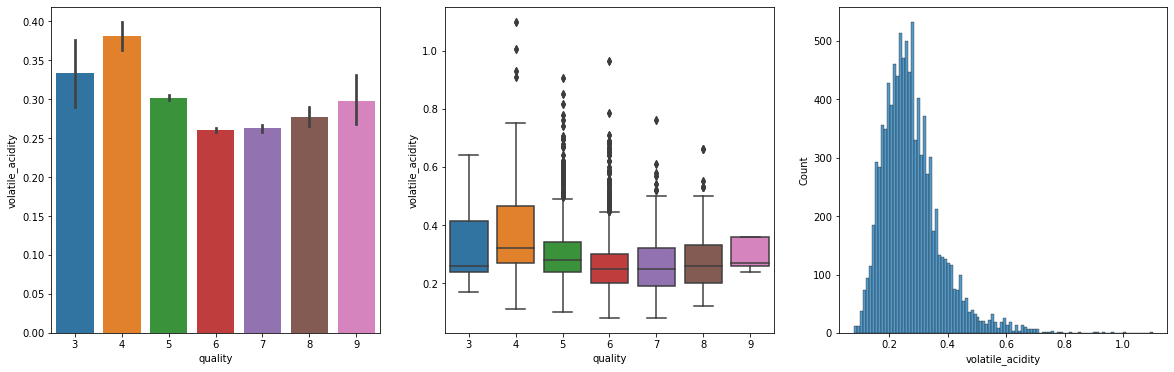

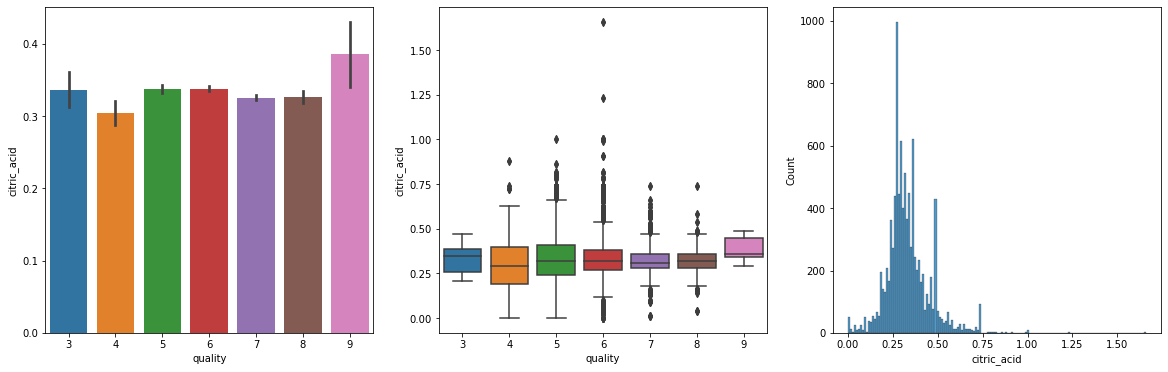

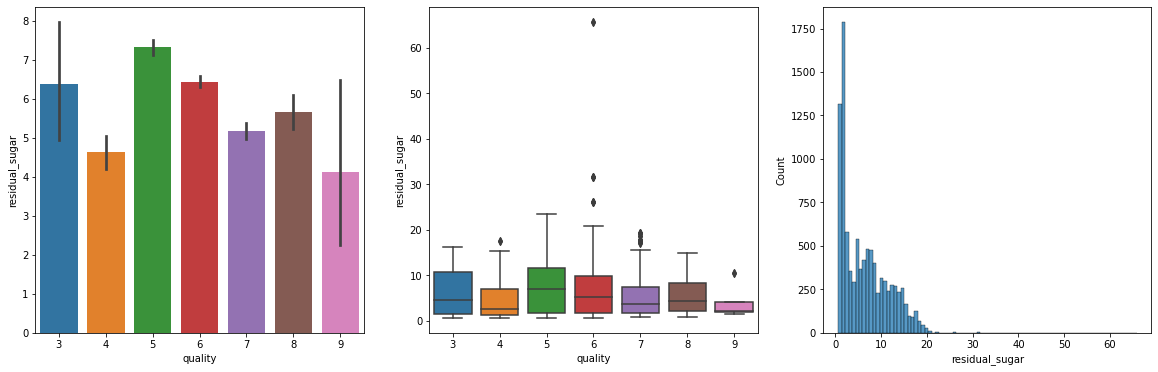

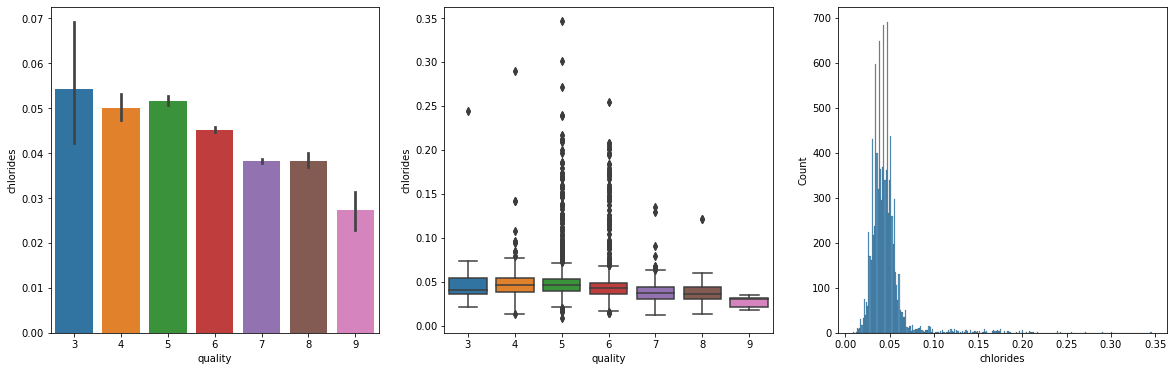

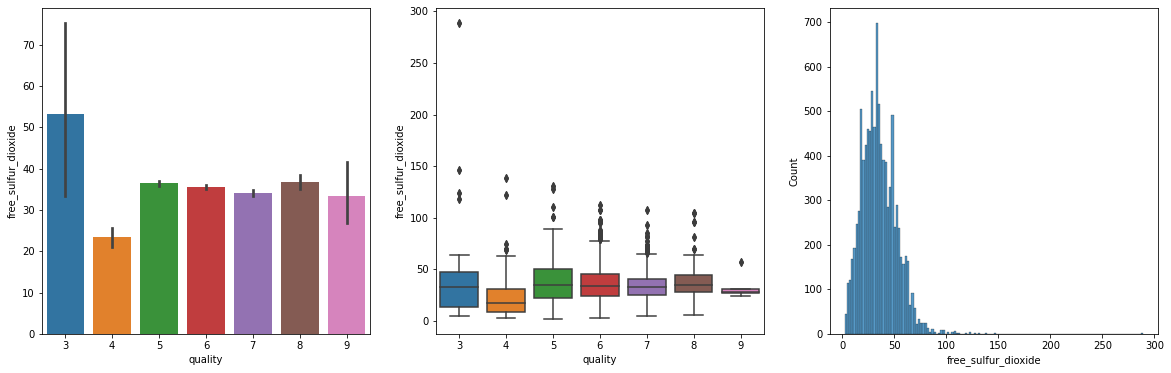

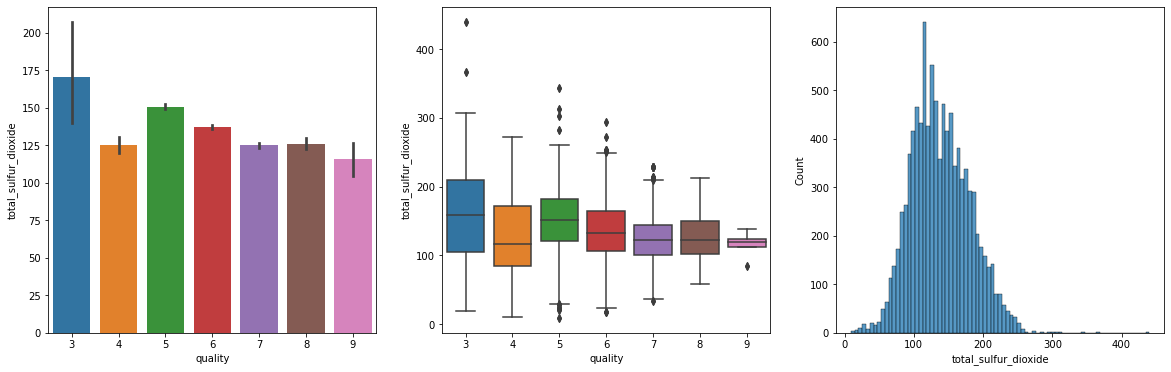

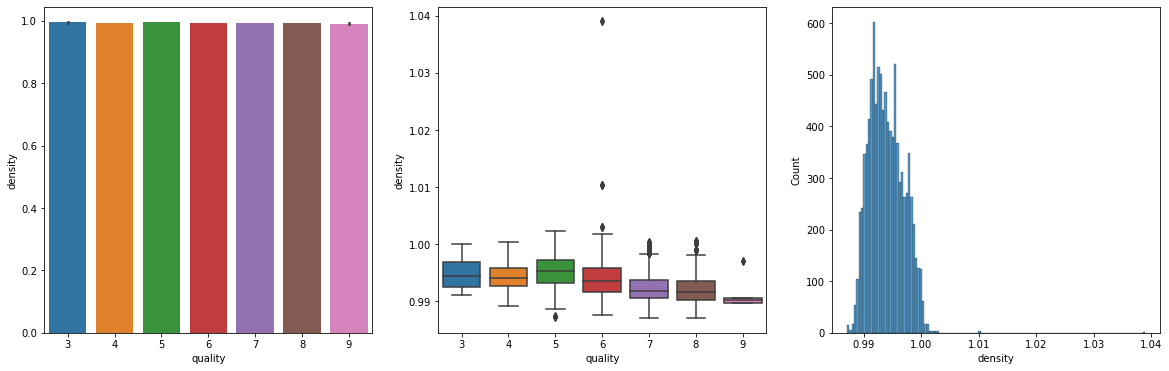

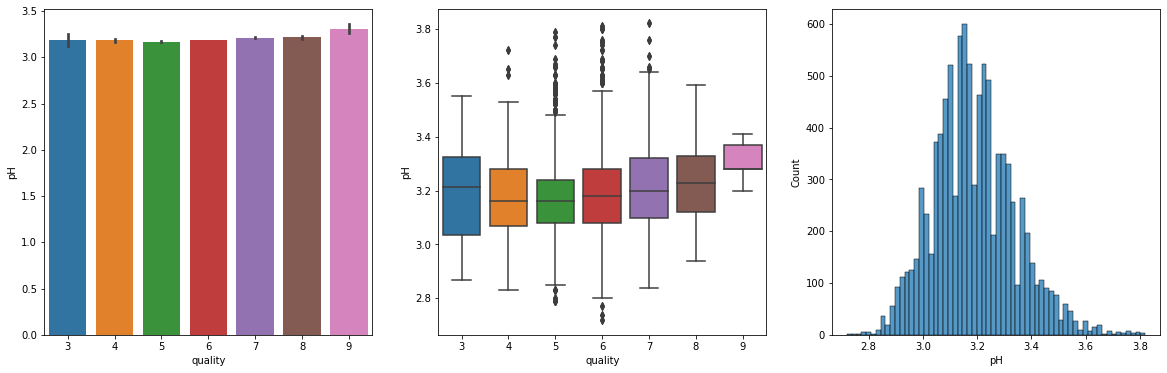

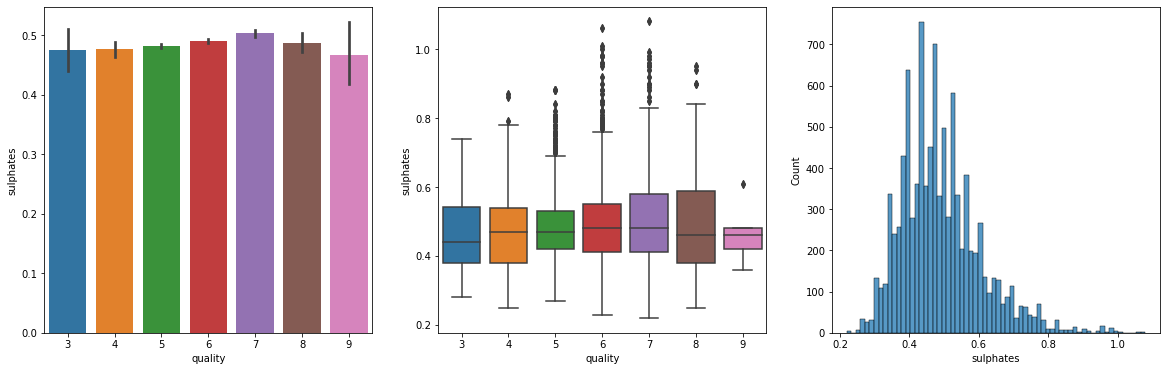

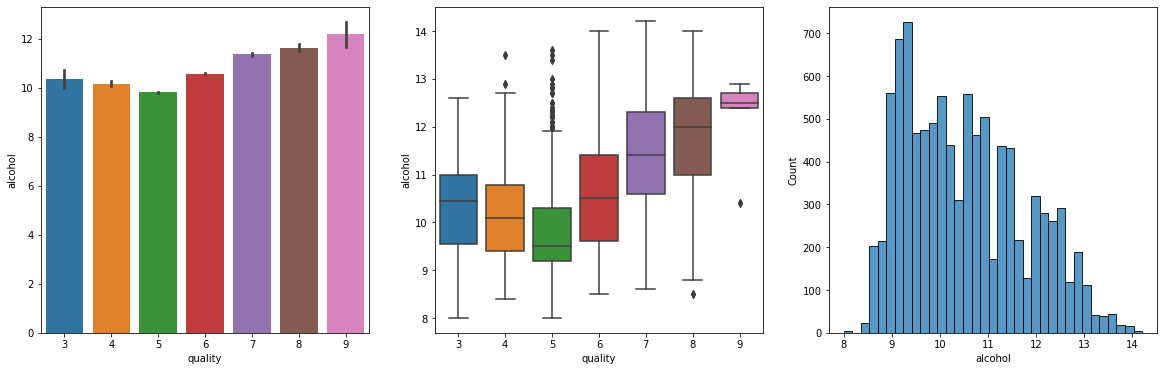

In [5]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

## Train/Test Split

We will separate our data into training and testing subsets to validate our model when it is completed.

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=16)

## Baseline Model

Our first model willlook at all features with no transformations to establish a baseline which can be improved upon.

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [8]:
iteration_0 = list(df.columns)
iteration_0.remove('quality')

In [9]:
f = 'quality ~ '+ '+'.join(iteration_0)
model_1 = ols(formula=f, data=train).fit()

In [10]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     252.7
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:01:29   Log-Likelihood:                -8852.4
No. Observations:                7836   AIC:                         1.773e+04
Df Residuals:                    7823   BIC:                         1.782e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.2157     10.492     10.409      0.000      88.648     129.783
fixed_acidity            0.0738      0.017      4.343      0.000       0.041       0.107
volatile_acidity        -1.8433      0.091    -20.341      0.000      -2.021      -1.666
citric_acid              0.0631      0.075      0.841      0.400      -0.084       0.210
residual_sugar           0.0869      0.006     14.036      0.000       0.075       0.099
chlorides               -0.2068      0.426     -0.485      0.627      -1.042       0.629
free_sulfur_dioxide      0.0038      0.001      5.663      0.000       0.002       0.005
total_sulfur_dioxide    -0.0004      0.000     -1.179      0.238      -0.001       0.000
density               -164.0646     15.961    -10.279      0.000    -195.352    -132.777
pH                       0.7283      0.085      8.544      0.000       0.561       0.895
sulphates                0.6585      0.080      8.253      0.000       0.502       0.815
alcohol                  0.1756      0.020      8.696      0.000       0.136       0.215
white                   54.6124      5.246     10.410      0.000      44.329      64.896
red                     54.6033      5.246     10.408      0.000      44.320      64.887
==============================================================================
Omnibus:                      164.098   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.036
Skew:                           0.069   Prob(JB):                     2.66e-76
Kurtosis:                       4.023   Cond. No.                     8.95e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.21e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With an R-squared of 0.279, this model has plenty of room for improvement! P-values for citric acid, chlorides, and total sulfur dioxide are high, so I think it's wise to first check for collinearity.

In [11]:
predictors = train.iloc[:, :-1]

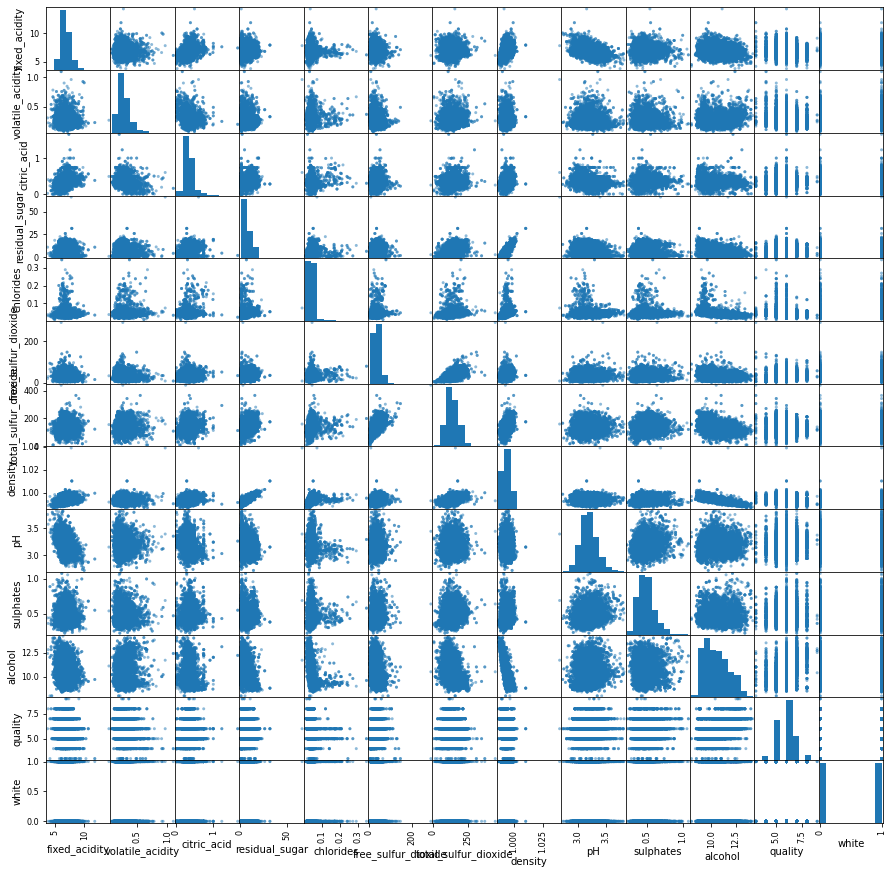

In [12]:
pd.plotting.scatter_matrix(predictors, figsize  = [15, 15]);

In [13]:
abs(predictors.corr()) >= 0.75

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white
fixed_acidity,True,False,False,False,False,False,False,False,False,False,False,False,False
volatile_acidity,False,True,False,False,False,False,False,False,False,False,False,False,False
citric_acid,False,False,True,False,False,False,False,False,False,False,False,False,False
residual_sugar,False,False,False,True,False,False,False,True,False,False,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False,False,False
free_sulfur_dioxide,False,False,False,False,False,True,False,False,False,False,False,False,False
total_sulfur_dioxide,False,False,False,False,False,False,True,False,False,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,True,False,False
pH,False,False,False,False,False,False,False,False,True,False,False,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False,False,False


Significant correlations exist between density and residual sugar and density and alcohol. We will remove density as a variable in our next iteration.

## Iteration 1

For this iteration, we will transform chlorides and total sulfur dioxide, because those variables had insignificant P-values in our baseline model. We won't transform citric acid yet, even though it also had an insignificant p-value, because our initial attempt at a log transform caused a divide by zero error. Our hope is that transforming these two variables and dropping density, which had collinearity with multiple variables, will improve the model and provide more clarity about how to handle citric acid in a future iteration.

In [14]:
train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))

<ipython-input-14-65ddf3f56adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['chlorides_log'] = train['chlorides'].map(lambda x: np.log(x))
<ipython-input-14-65ddf3f56adf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['total_sulfur_dioxide_log'] = train['total_sulfur_dioxide'].map(lambda x: np.log(x))


In [15]:
f = 'quality ~ fixed_acidity+volatile_acidity+citric_acid+residual_sugar+free_sulfur_dioxide+pH+sulphates+alcohol+white+red+chlorides_log+total_sulfur_dioxide_log'
model_2 = ols(formula=f, data=train).fit()

In [16]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     262.6
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:10   Log-Likelihood:                -8905.0
No. Observations:                7836   AIC:                         1.783e+04
Df Residuals:                    7824   BIC:                         1.792e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.9960      0.205      4.865      0.000       0.595       1.397
fixed_acidity               -0.0613      0.012     -5.260      0.000      -0.084      -0.038
volatile_acidity            -2.0145      0.090    -22.467      0.000      -2.190      -1.839
citric_acid                 -0.0004      0.075     -0.005      0.996      -0.147       0.147
residual_sugar               0.0249      0.002     12.356      0.000       0.021       0.029
free_sulfur_dioxide          0.0029      0.001      4.536      0.000       0.002       0.004
pH                           0.1214      0.065      1.854      0.064      -0.007       0.250
sulphates                    0.3909      0.077      5.068      0.000       0.240       0.542
alcohol                      0.3653      0.009     39.384      0.000       0.347       0.383
white                        0.5024      0.103      4.889      0.000       0.301       0.704
red                          0.4936      0.103      4.807      0.000       0.292       0.695
chlorides_log               -0.1200      0.030     -3.978      0.000      -0.179      -0.061
total_sulfur_dioxide_log     0.0618      0.036      1.720      0.085      -0.009       0.132
==============================================================================
Omnibus:                      150.339   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.264
Skew:                           0.065   Prob(JB):                     1.90e-67
Kurtosis:                       3.961   Cond. No.                     4.01e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.54e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Iteration 2

For our second iteration, we will log transform volatile acidity, residual sugar, free sulfur dioxide, and sulphates, as those variables each have skewed distributions.

In [17]:
train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
train['free_sulfur_dioxide_log'] = train['free_sulfur_dioxide'].map(lambda x: np.log(x))
train['sulphates_log'] = train['sulphates'].map(lambda x: np.log(x))

<ipython-input-17-1323f32790b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['volatile_acidity_log'] = train['volatile_acidity'].map(lambda x: np.log(x))
<ipython-input-17-1323f32790b1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['residual_sugar_log'] = train['residual_sugar'].map(lambda x: np.log(x))
<ipython-input-17-1323f32790b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [18]:
f = 'quality ~ fixed_acidity + citric_acid + pH + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_3 = ols(formula=f, data=train).fit()

In [19]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     291.9
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:10   Log-Likelihood:                -8789.0
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4904      0.208      2.360      0.018       0.083       0.898
fixed_acidity               -0.0469      0.011     -4.075      0.000      -0.069      -0.024
citric_acid                  0.0261      0.074      0.355      0.723      -0.118       0.171
pH                           0.1136      0.064      1.761      0.078      -0.013       0.240
alcohol                      0.3545      0.009     39.562      0.000       0.337       0.372
white                        0.2493      0.104      2.391      0.017       0.045       0.454
red                          0.2411      0.104      2.313      0.021       0.037       0.445
chlorides_log               -0.1145      0.030     -3.854      0.000      -0.173      -0.056
total_sulfur_dioxide_log    -0.1636      0.037     -4.376      0.000      -0.237      -0.090
volatile_acidity_log        -0.5639      0.027    -21.110      0.000      -0.616      -0.512
residual_sugar_log           0.1371      0.011     12.708      0.000       0.116       0.158
free_sulfur_dioxide_log      0.2899      0.021     14.041      0.000       0.249       0.330
sulphates_log                0.2082      0.039      5.341      0.000       0.132       0.285
==============================================================================
Omnibus:                      152.683   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.055
Skew:                           0.109   Prob(JB):                     8.50e-65
Kurtosis:                       3.925   Cond. No.                     2.12e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.84e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This model has improved our r-squared to 0.291! P values for pH and citric acid still need to be improved.

## Iteration 3

Our first attempt at transforming citric acid didn't work because we got a divide by zero error. To eliminate this, we will add 1 to each citric acid value and then log transform that data. 

In [20]:
train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)

<ipython-input-20-bb9c4832a600>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid'] = train['citric_acid'].map(lambda x: x+1)


In [21]:
train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))

<ipython-input-21-662a32c4a65b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['citric_acid_log'] = train['citric_acid'].map(lambda x: np.log(x))


In [22]:
f = 'quality ~ fixed_acidity + citric_acid_log + pH + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_4 = ols(formula=f, data=train).fit()

In [23]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     292.0
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:02:10   Log-Likelihood:                -8788.5
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.768e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.4866      0.208      2.341      0.019       0.079       0.894
fixed_acidity               -0.0488      0.012     -4.232      0.000      -0.071      -0.026
citric_acid_log              0.1078      0.103      1.048      0.295      -0.094       0.310
pH                           0.1168      0.064      1.811      0.070      -0.010       0.243
alcohol                      0.3541      0.009     39.482      0.000       0.337       0.372
white                        0.2474      0.104      2.372      0.018       0.043       0.452
red                          0.2392      0.104      2.295      0.022       0.035       0.444
chlorides_log               -0.1159      0.030     -3.902      0.000      -0.174      -0.058
total_sulfur_dioxide_log    -0.1653      0.037     -4.420      0.000      -0.239      -0.092
volatile_acidity_log        -0.5606      0.027    -20.902      0.000      -0.613      -0.508
residual_sugar_log           0.1369      0.011     12.686      0.000       0.116       0.158
free_sulfur_dioxide_log      0.2897      0.021     14.029      0.000       0.249       0.330
sulphates_log                0.2064      0.039      5.293      0.000       0.130       0.283
==============================================================================
Omnibus:                      153.472   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.783
Skew:                           0.110   Prob(JB):                     3.58e-65
Kurtosis:                       3.928   Cond. No.                     1.49e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.8e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

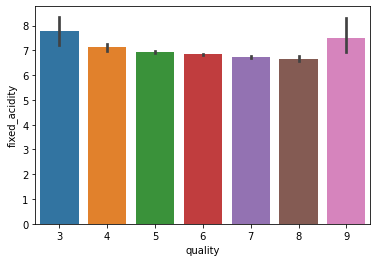

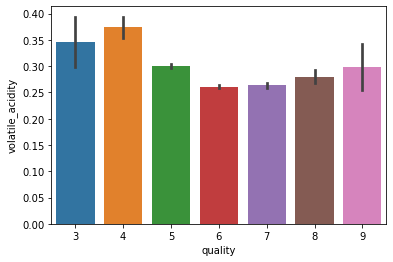

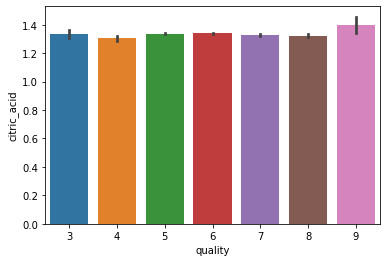

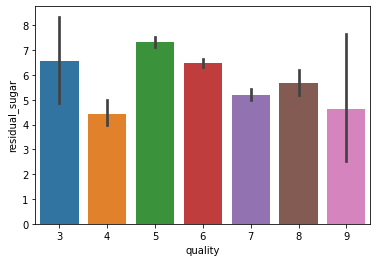

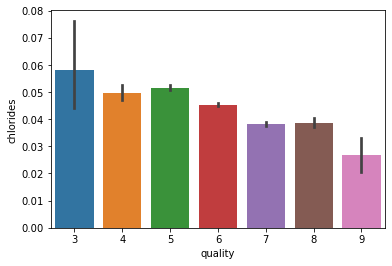

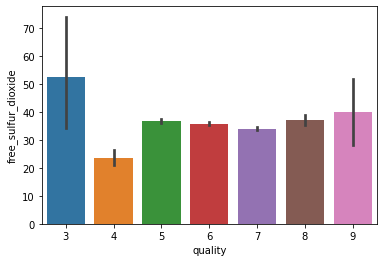

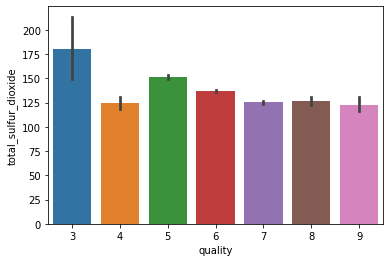

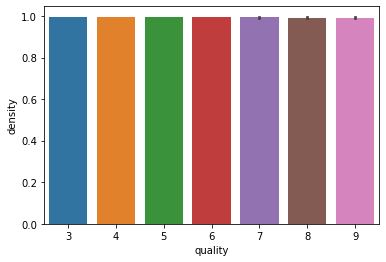

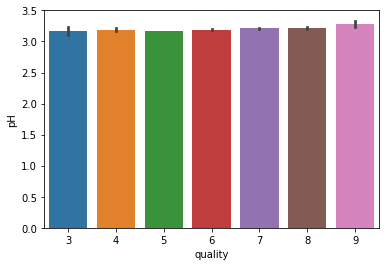

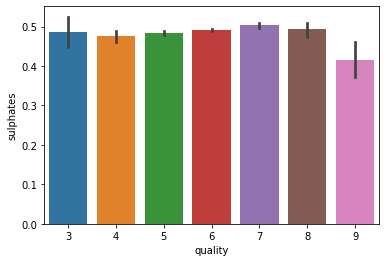

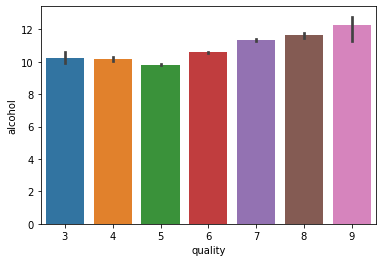

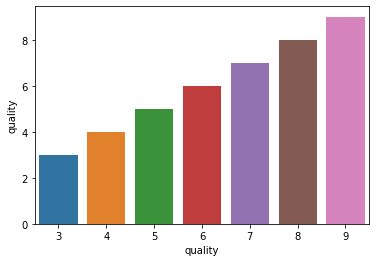

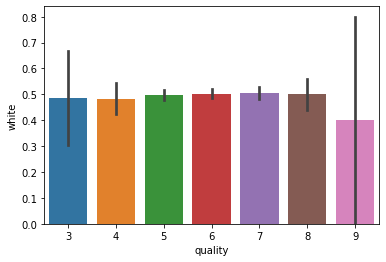

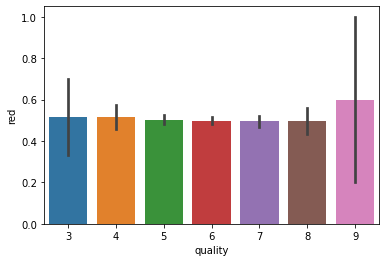

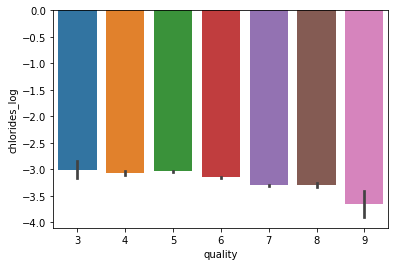

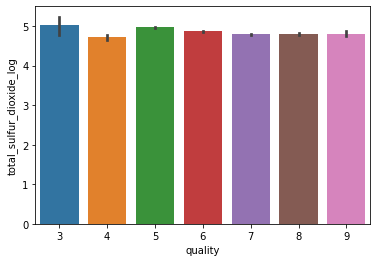

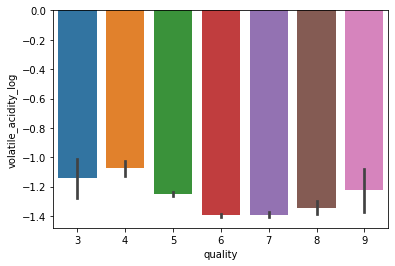

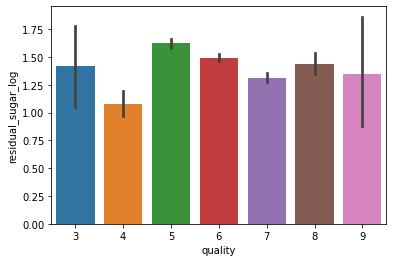

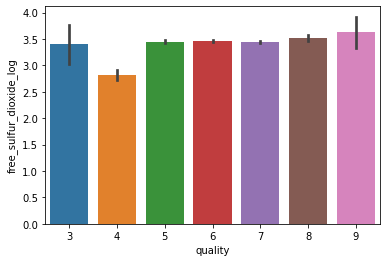

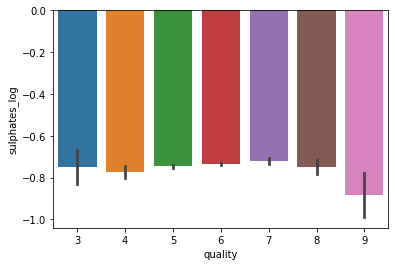

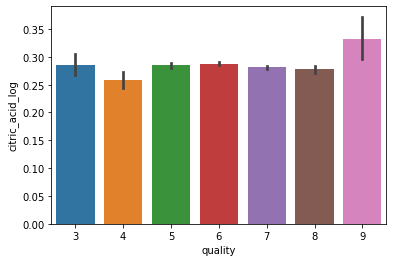

In [24]:
for column in train:
    sns.barplot(data=train, x='quality', y=column)
    plt.show()

In [25]:
data = ['fixed_acidity', 'citric_acid_log', 'pH', 'alcohol', 'white', 'red', 'chlorides_log', 'total_sulfur_dioxide_log', 'volatile_acidity_log', 'residual_sugar_log', 'free_sulfur_dioxide_log', 'sulphates_log']

In [26]:
for column in data:
    fig = plt.figure(figsize=(20, 20))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)

NameError: name 'model' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

## Iteration 4

In [ ]:
f = 'quality ~ pH + alcohol + white + red + volatile_acidity_log + residual_sugar_log + sulphates_log'
model = ols(formula=f, data=train).fit()

In [ ]:
model.summary()

In [29]:
f = 'quality ~ fixed_acidity + alcohol + white + red + chlorides_log + total_sulfur_dioxide_log + volatile_acidity_log + residual_sugar_log + free_sulfur_dioxide_log + sulphates_log'
model_5 = ols(formula=f, data=train).fit()

In [30]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:                -8790.5
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7826   BIC:                         1.767e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.7389      0.152      4.865      0.000       0.441       1.037
fixed_acidity               -0.0543      0.010     -5.371      0.000      -0.074      -0.034
alcohol                      0.3555      0.009     39.759      0.000       0.338       0.373
white                        0.3736      0.076      4.889      0.000       0.224       0.523
red                          0.3653      0.076      4.782      0.000       0.216       0.515
chlorides_log               -0.1161      0.030     -3.923      0.000      -0.174      -0.058
total_sulfur_dioxide_log    -0.1541      0.037     -4.167      0.000      -0.227      -0.082
volatile_acidity_log        -0.5682      0.026    -21.527      0.000      -0.620      -0.516
residual_sugar_log           0.1340      0.011     12.602      0.000       0.113       0.155
free_sulfur_dioxide_log      0.2884      0.021     13.987      0.000       0.248       0.329
sulphates_log                0.2189      0.038      5.689      0.000       0.143       0.294
==============================================================================
Omnibus:                      152.344   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.341
Skew:                           0.112   Prob(JB):                     3.30e-64
Kurtosis:                       3.919   Cond. No.                     1.48e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [36]:
data.remove('pH')
data.remove('citric_acid_log')

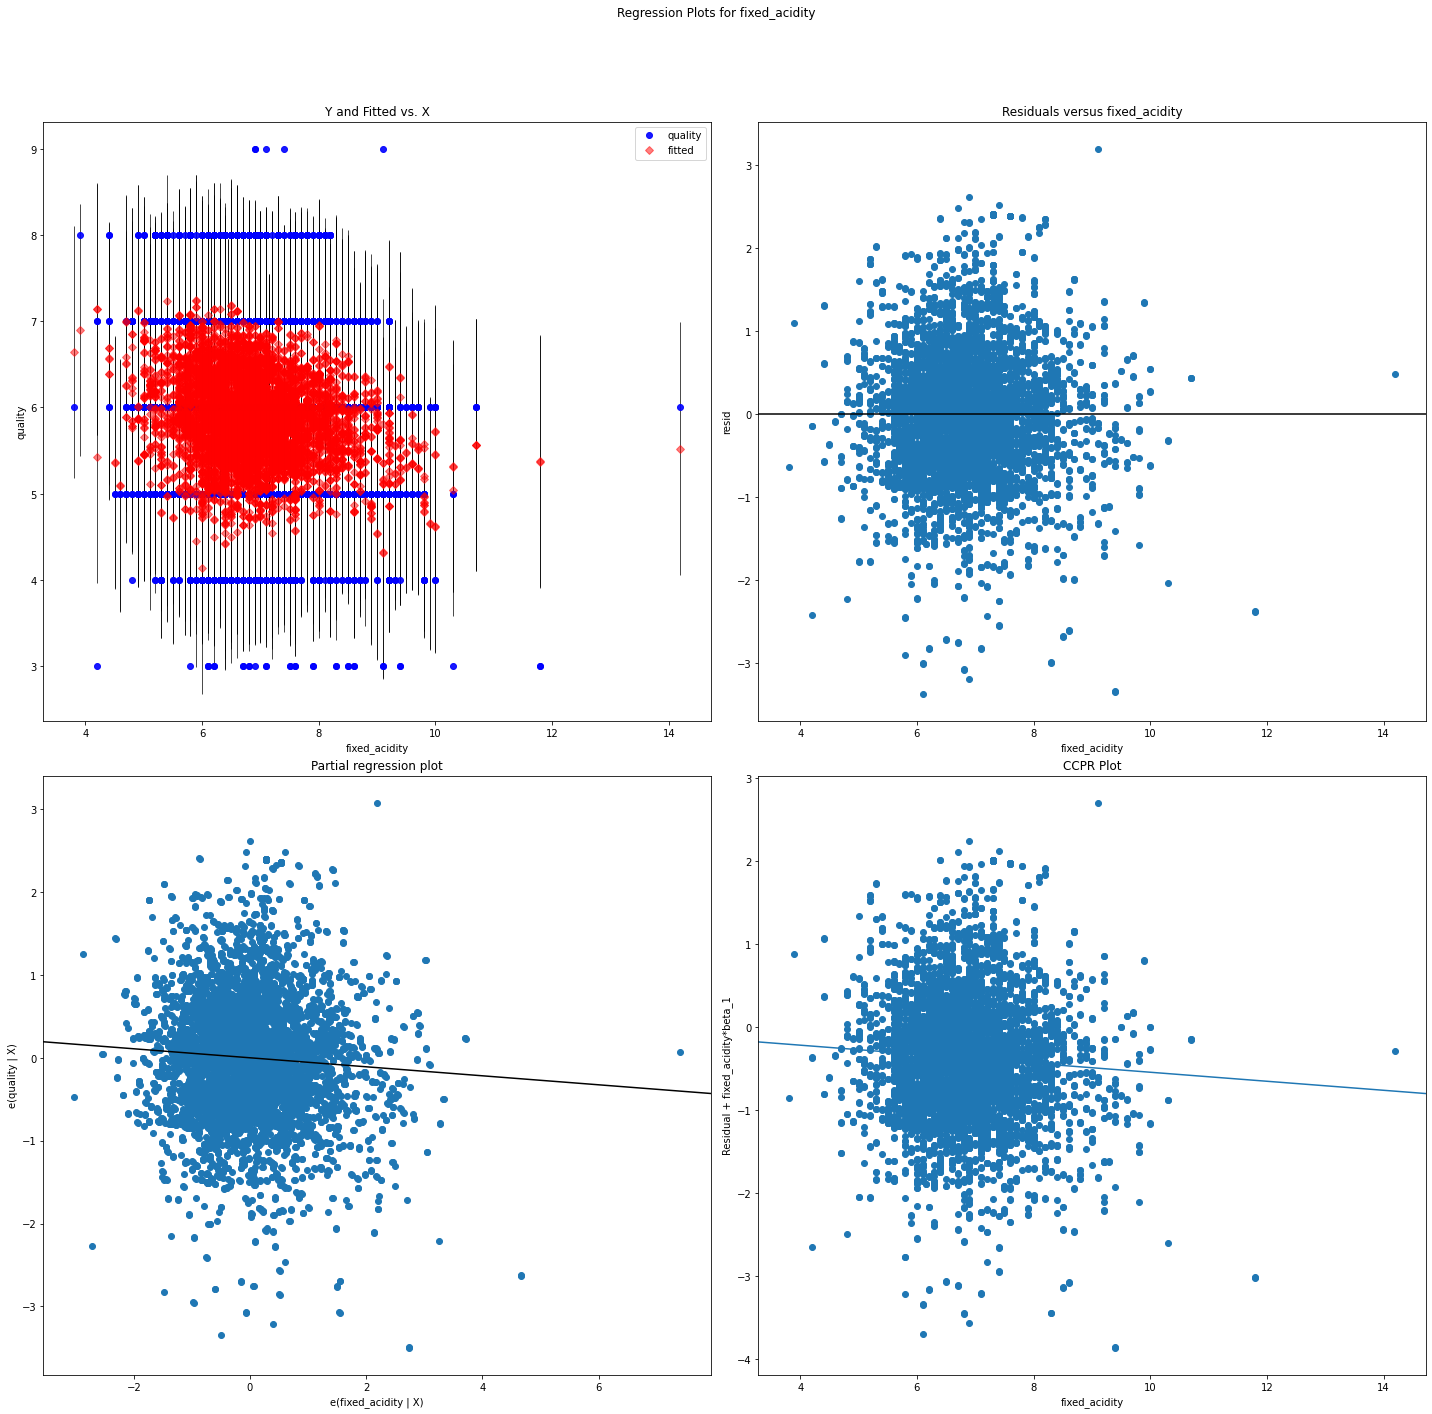

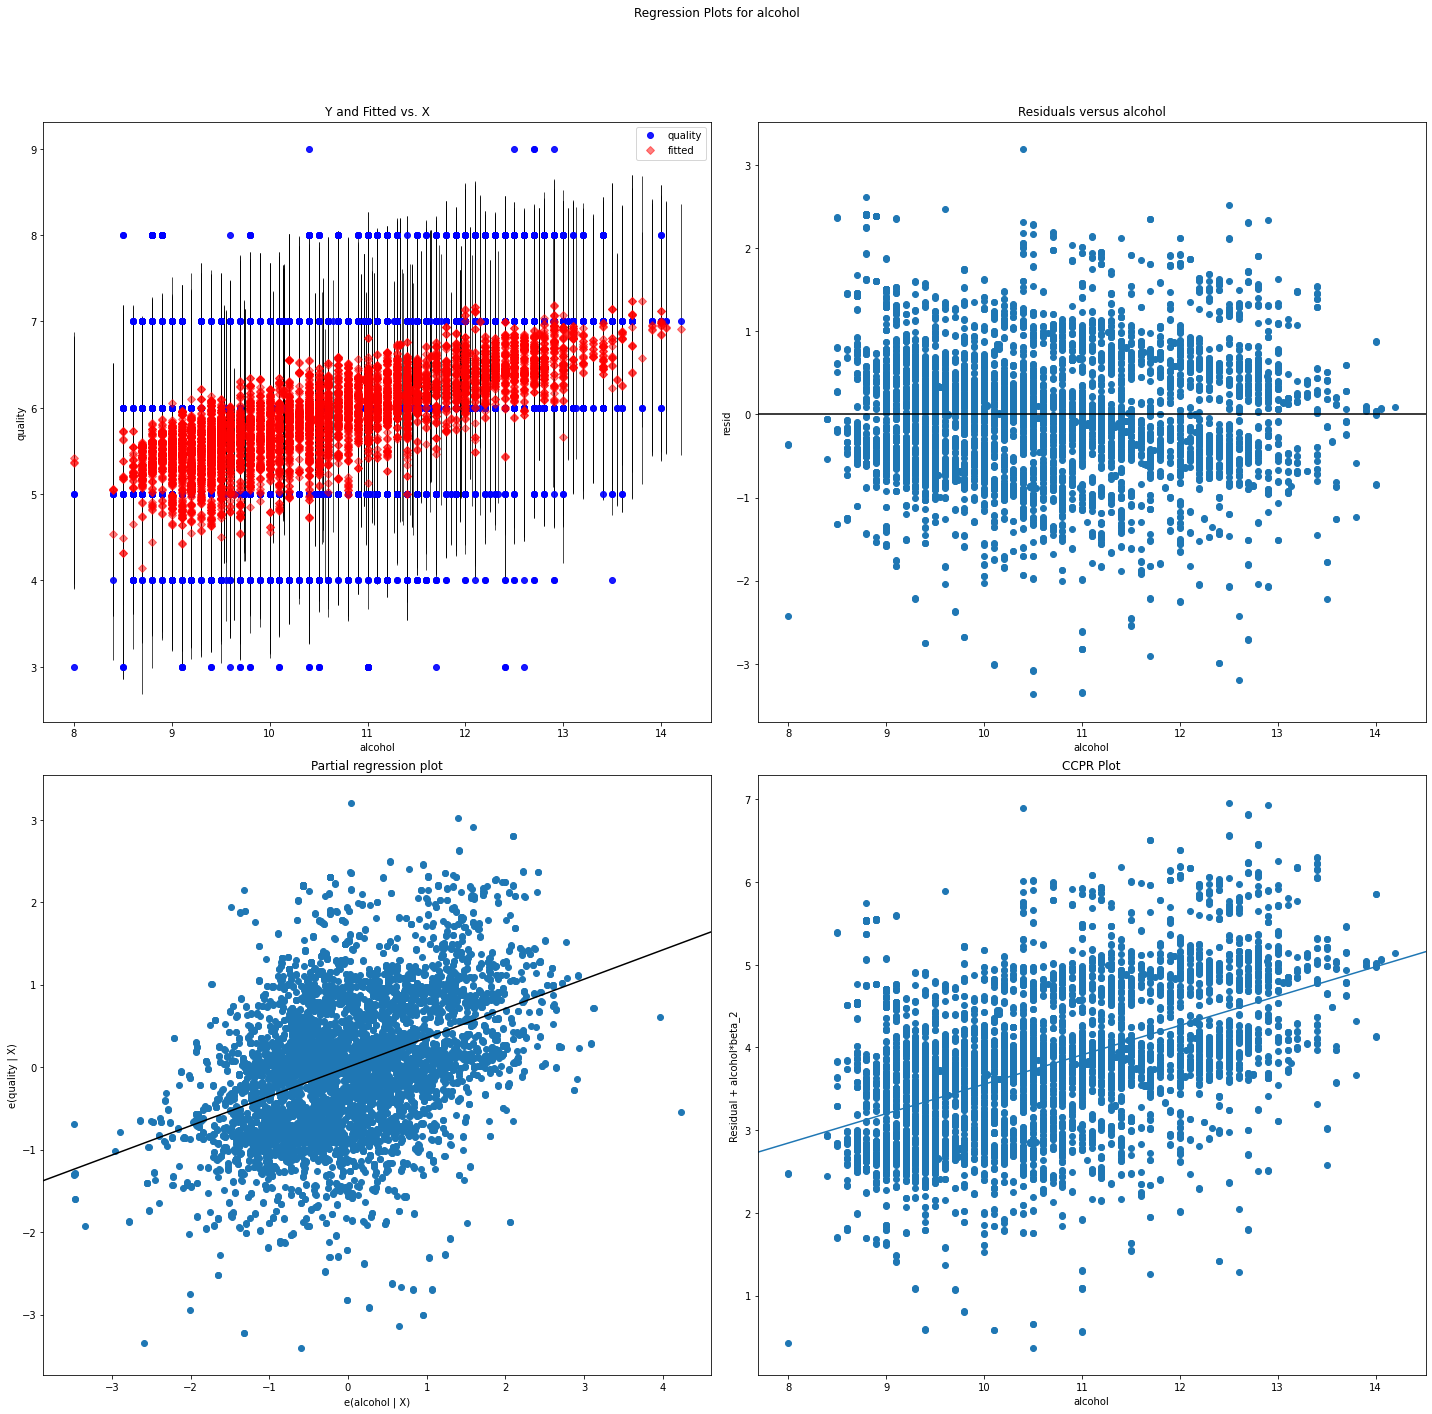

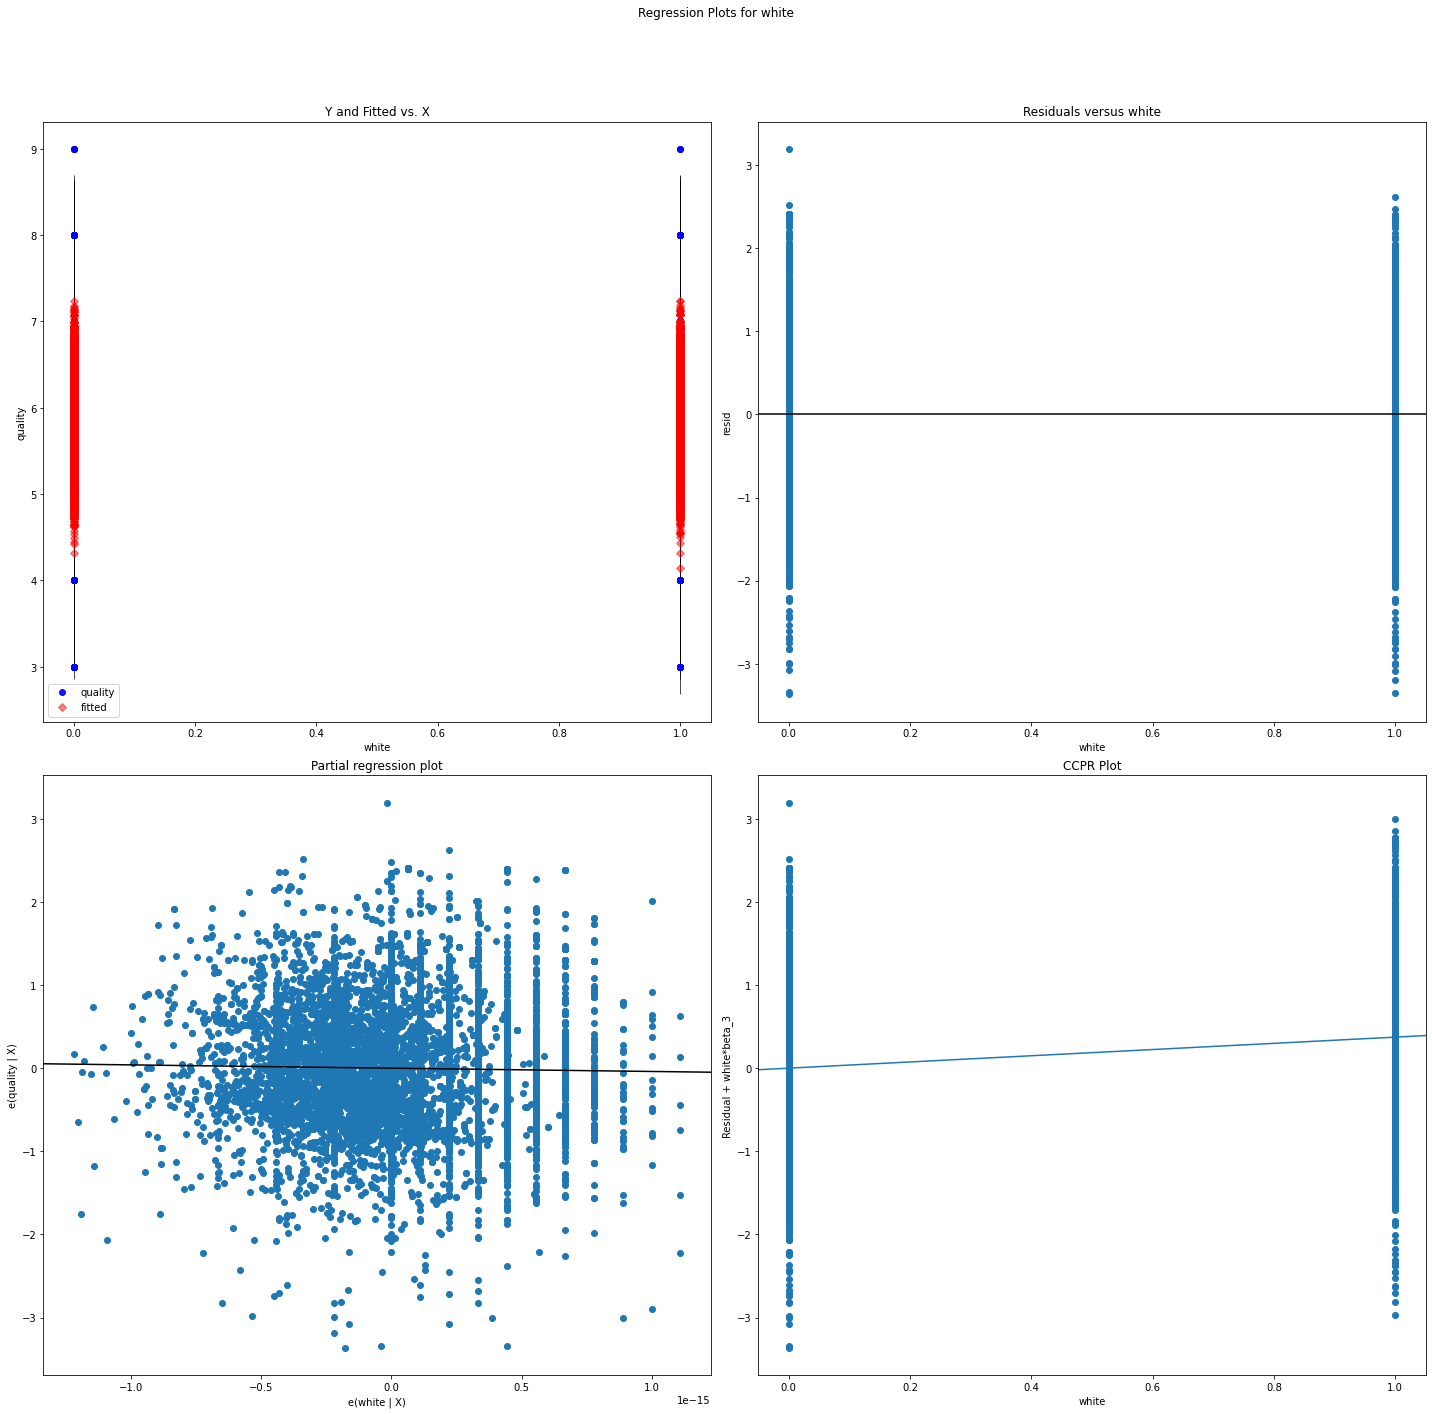

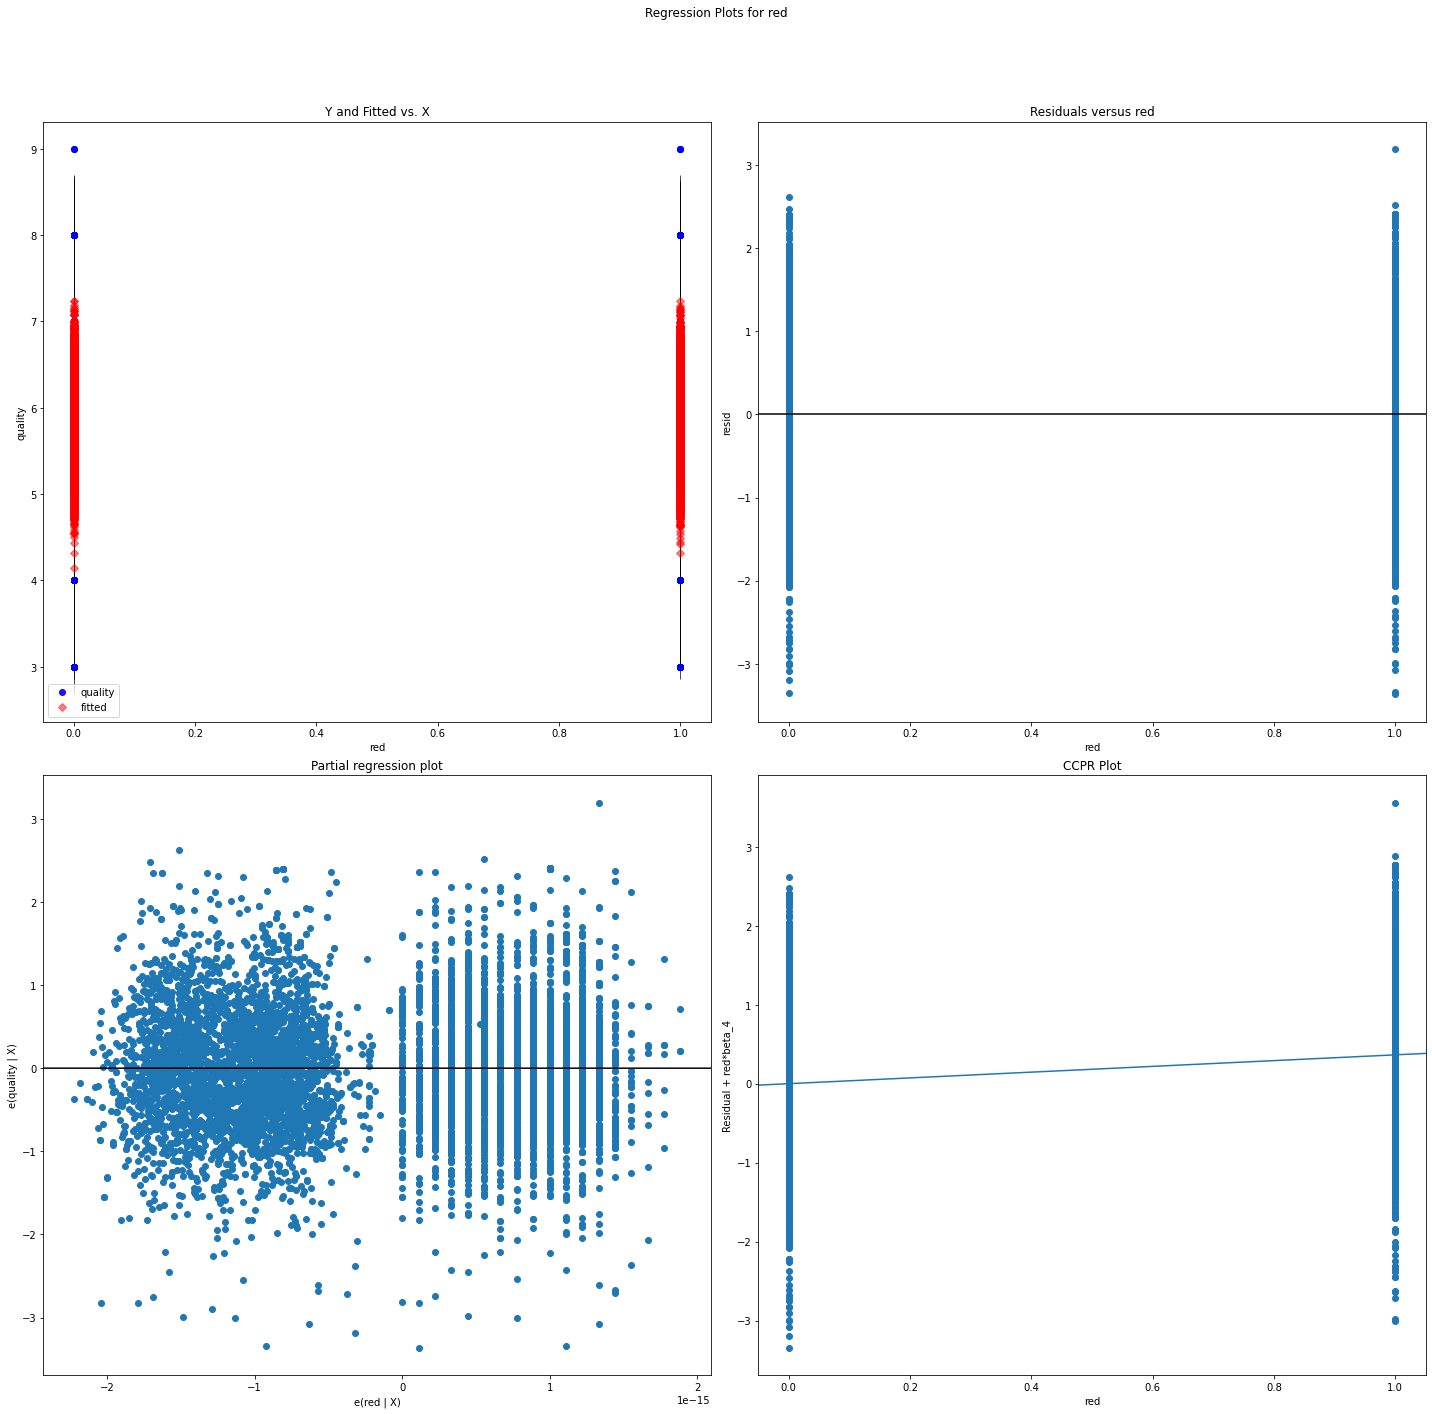

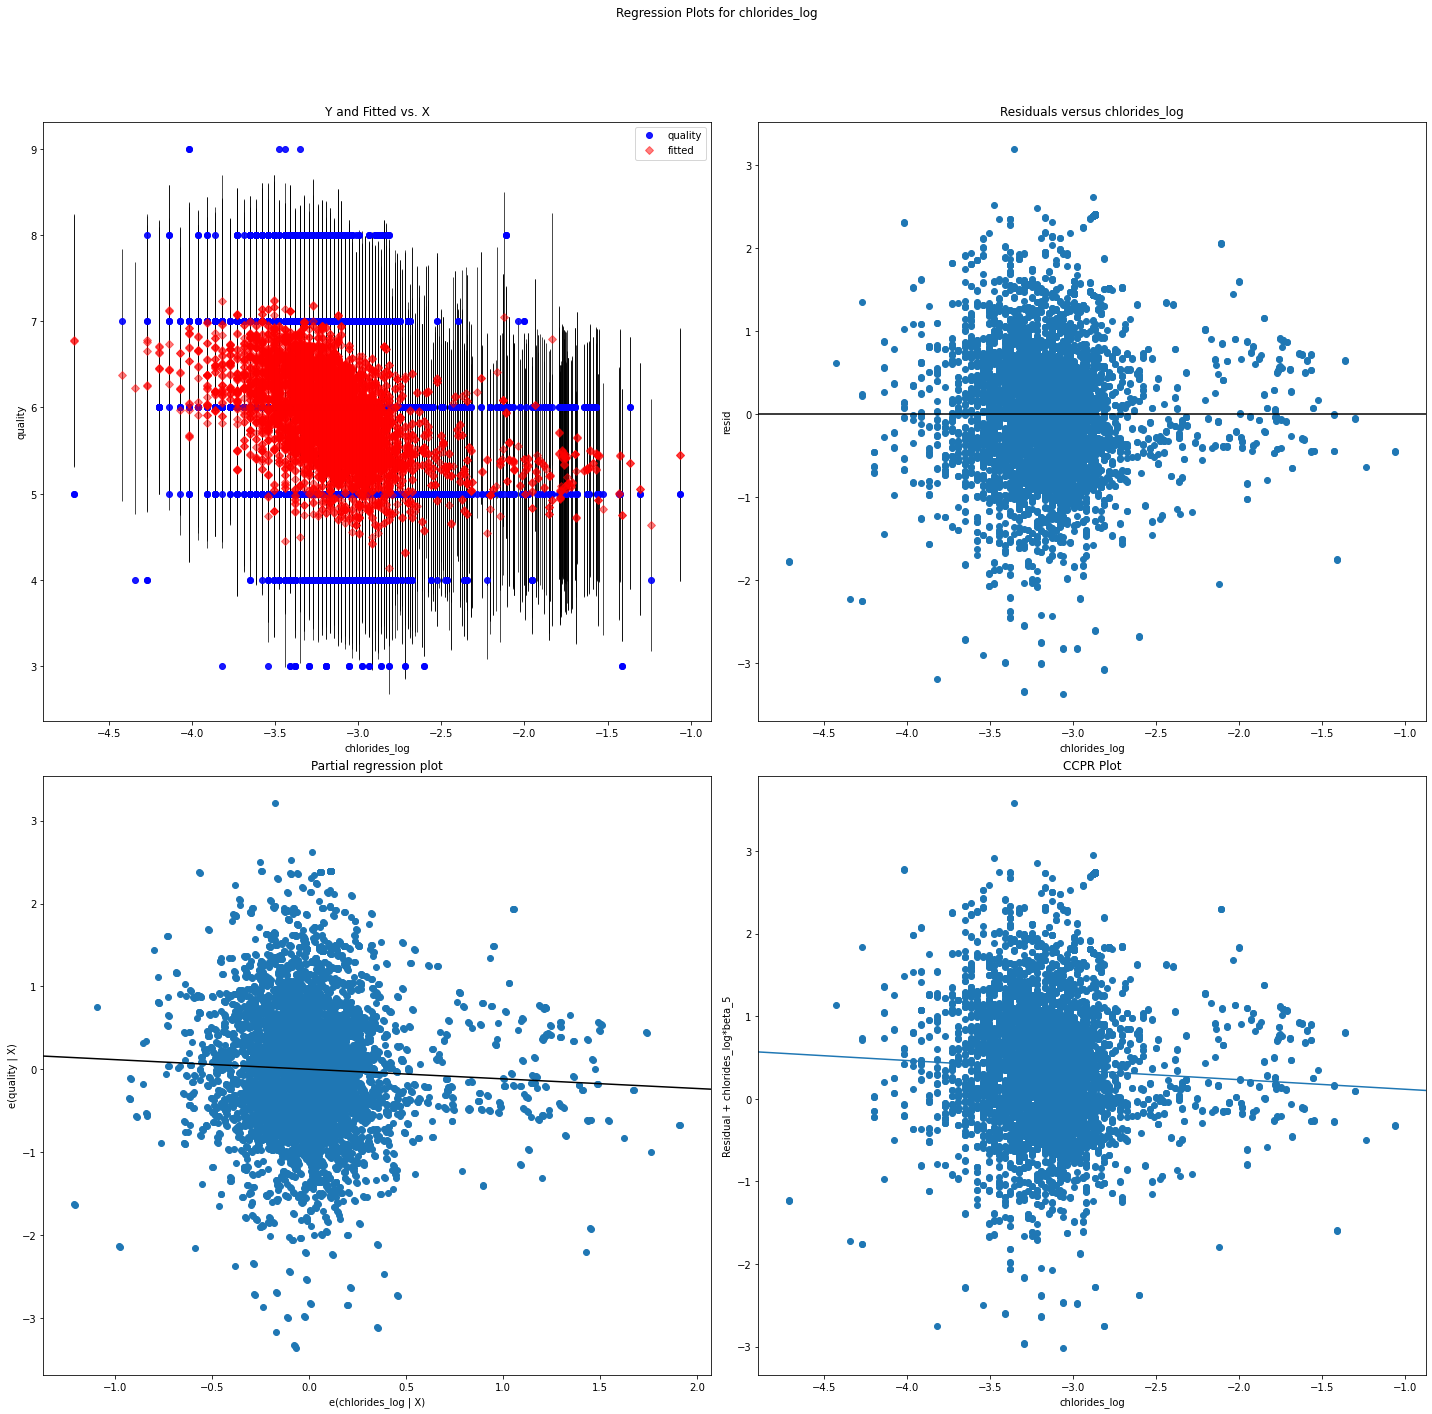

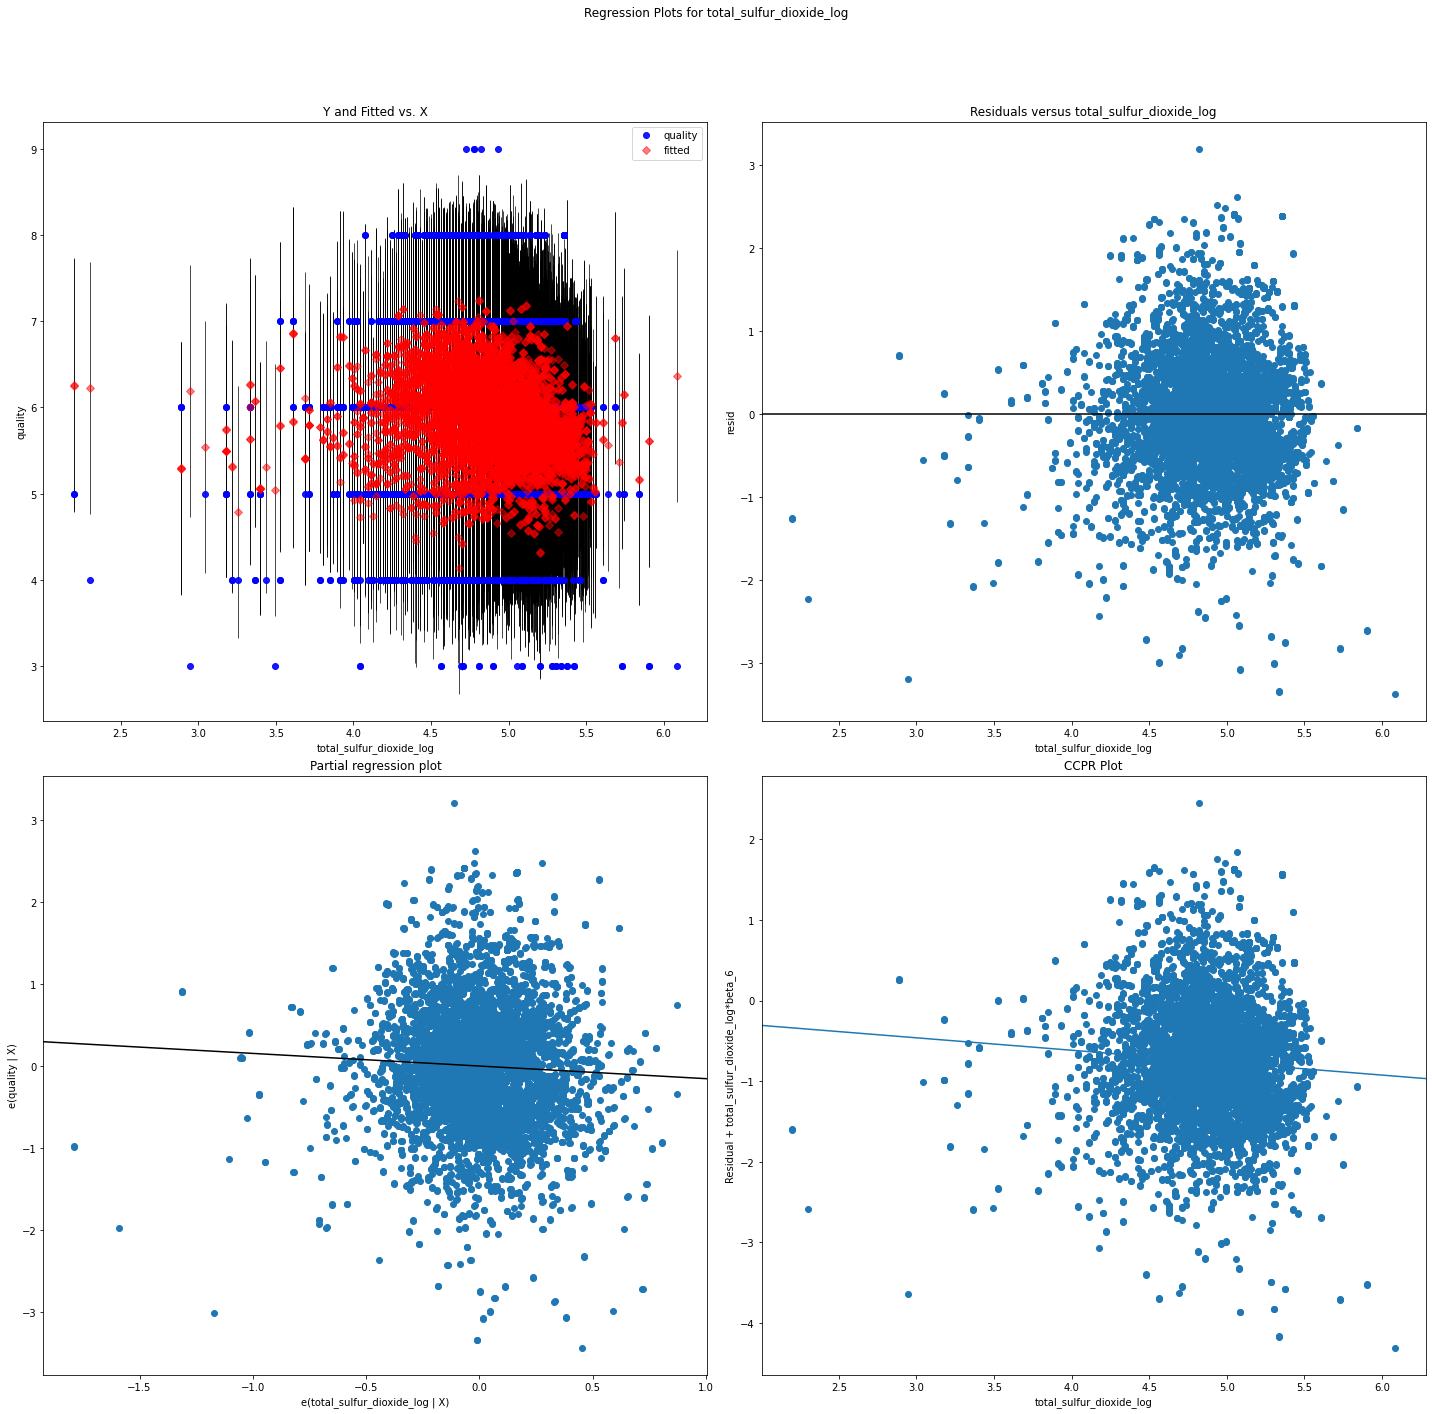

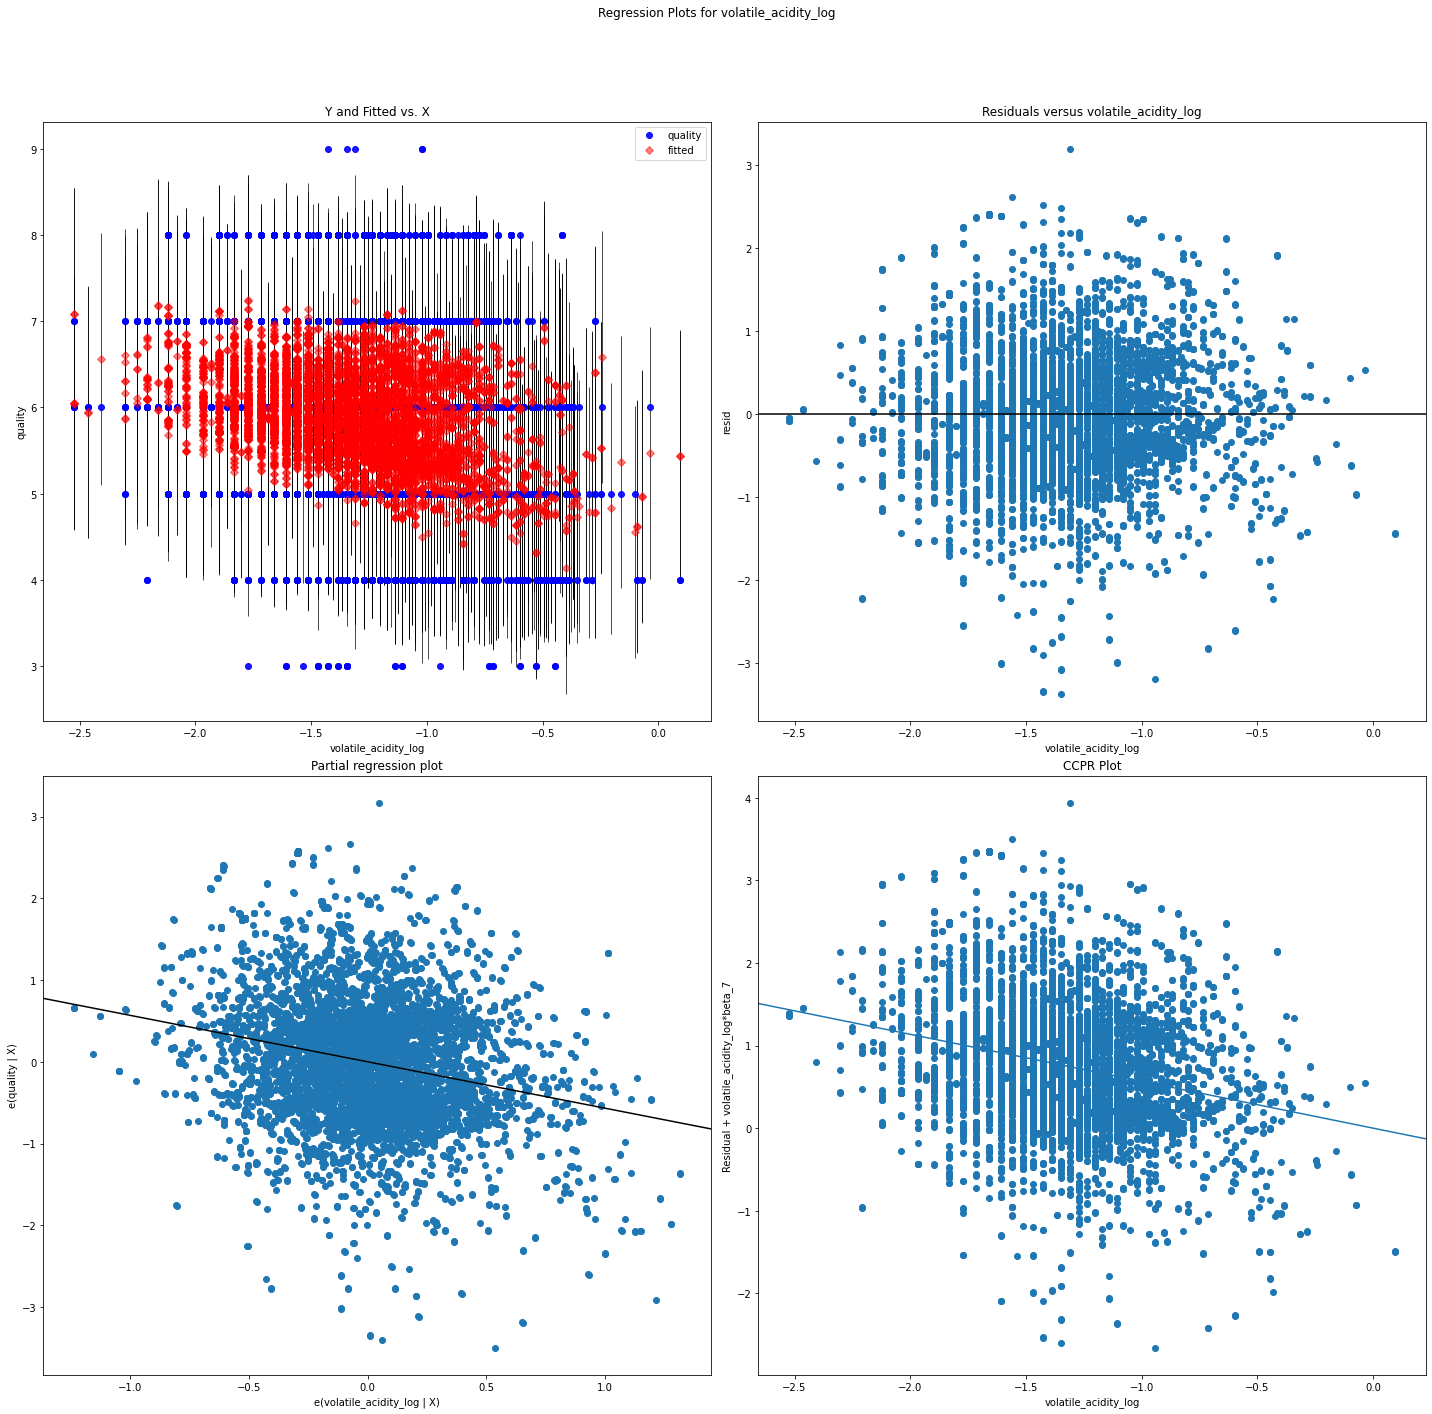

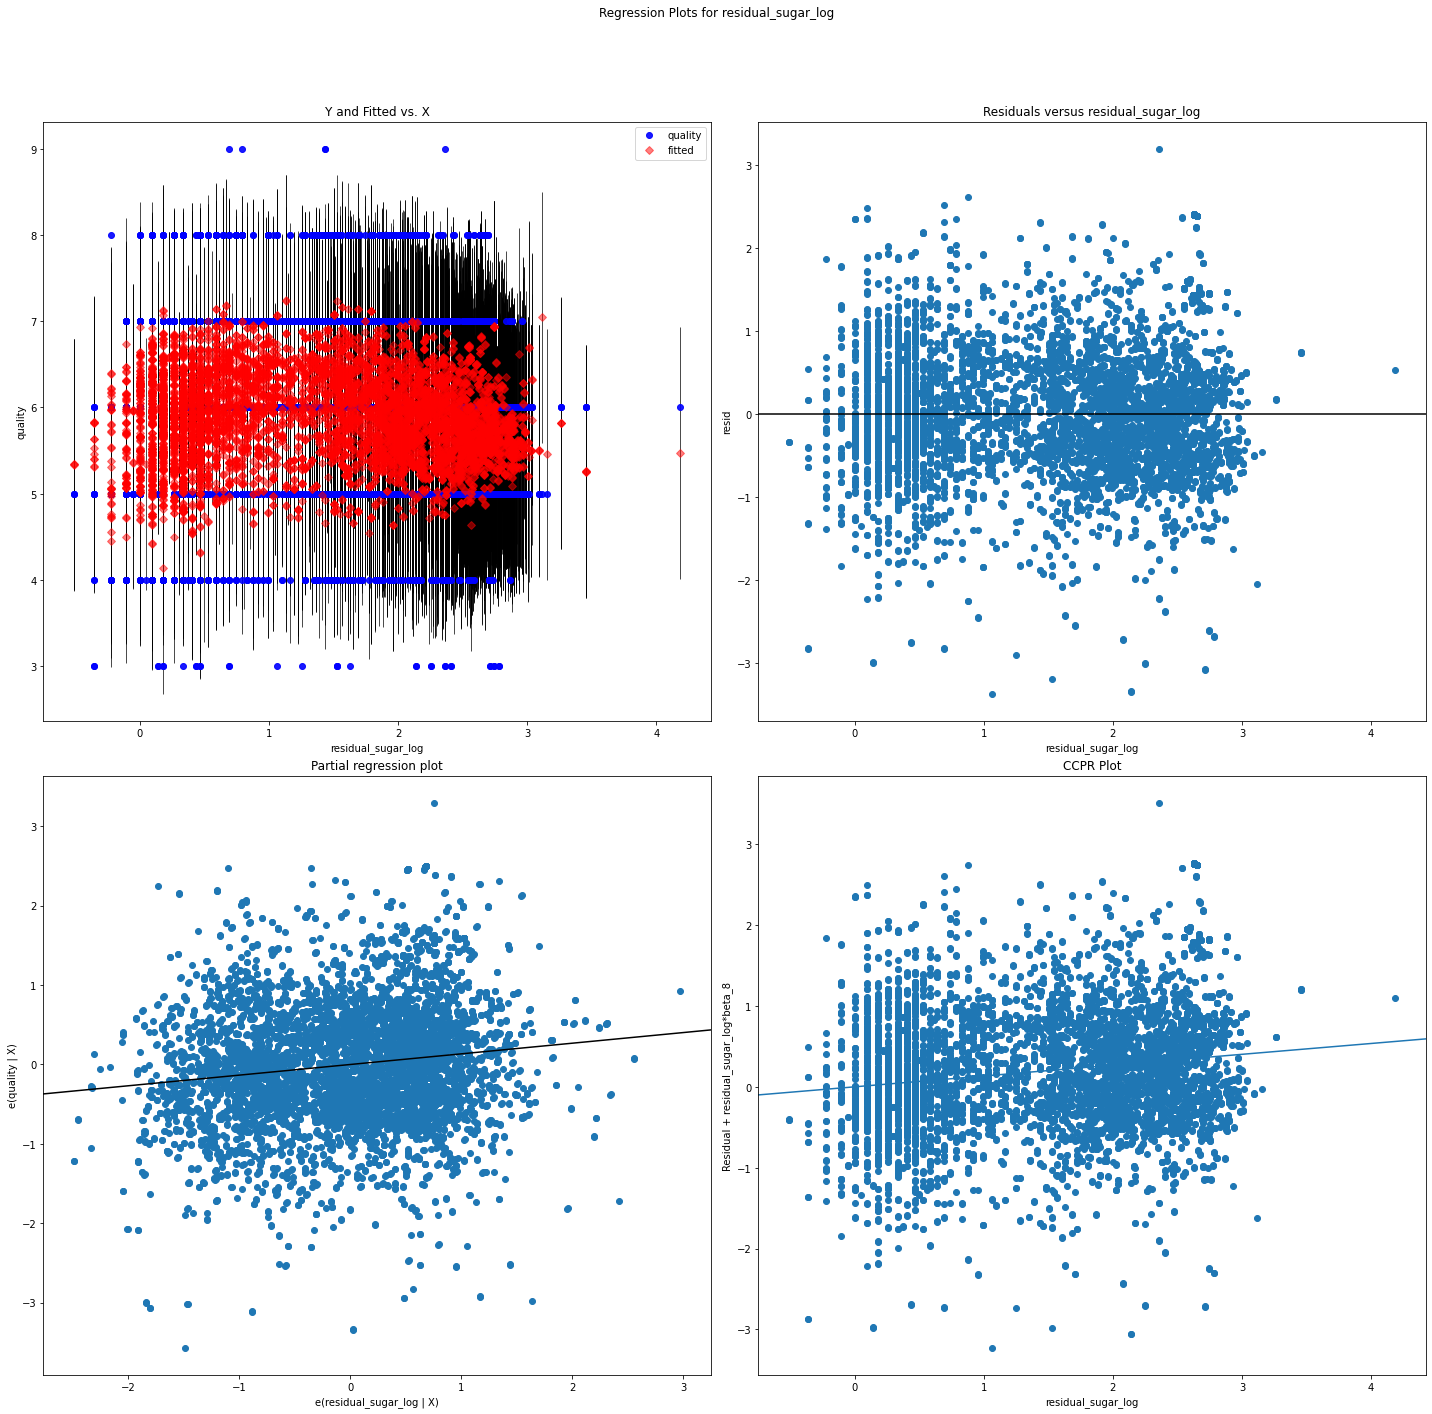

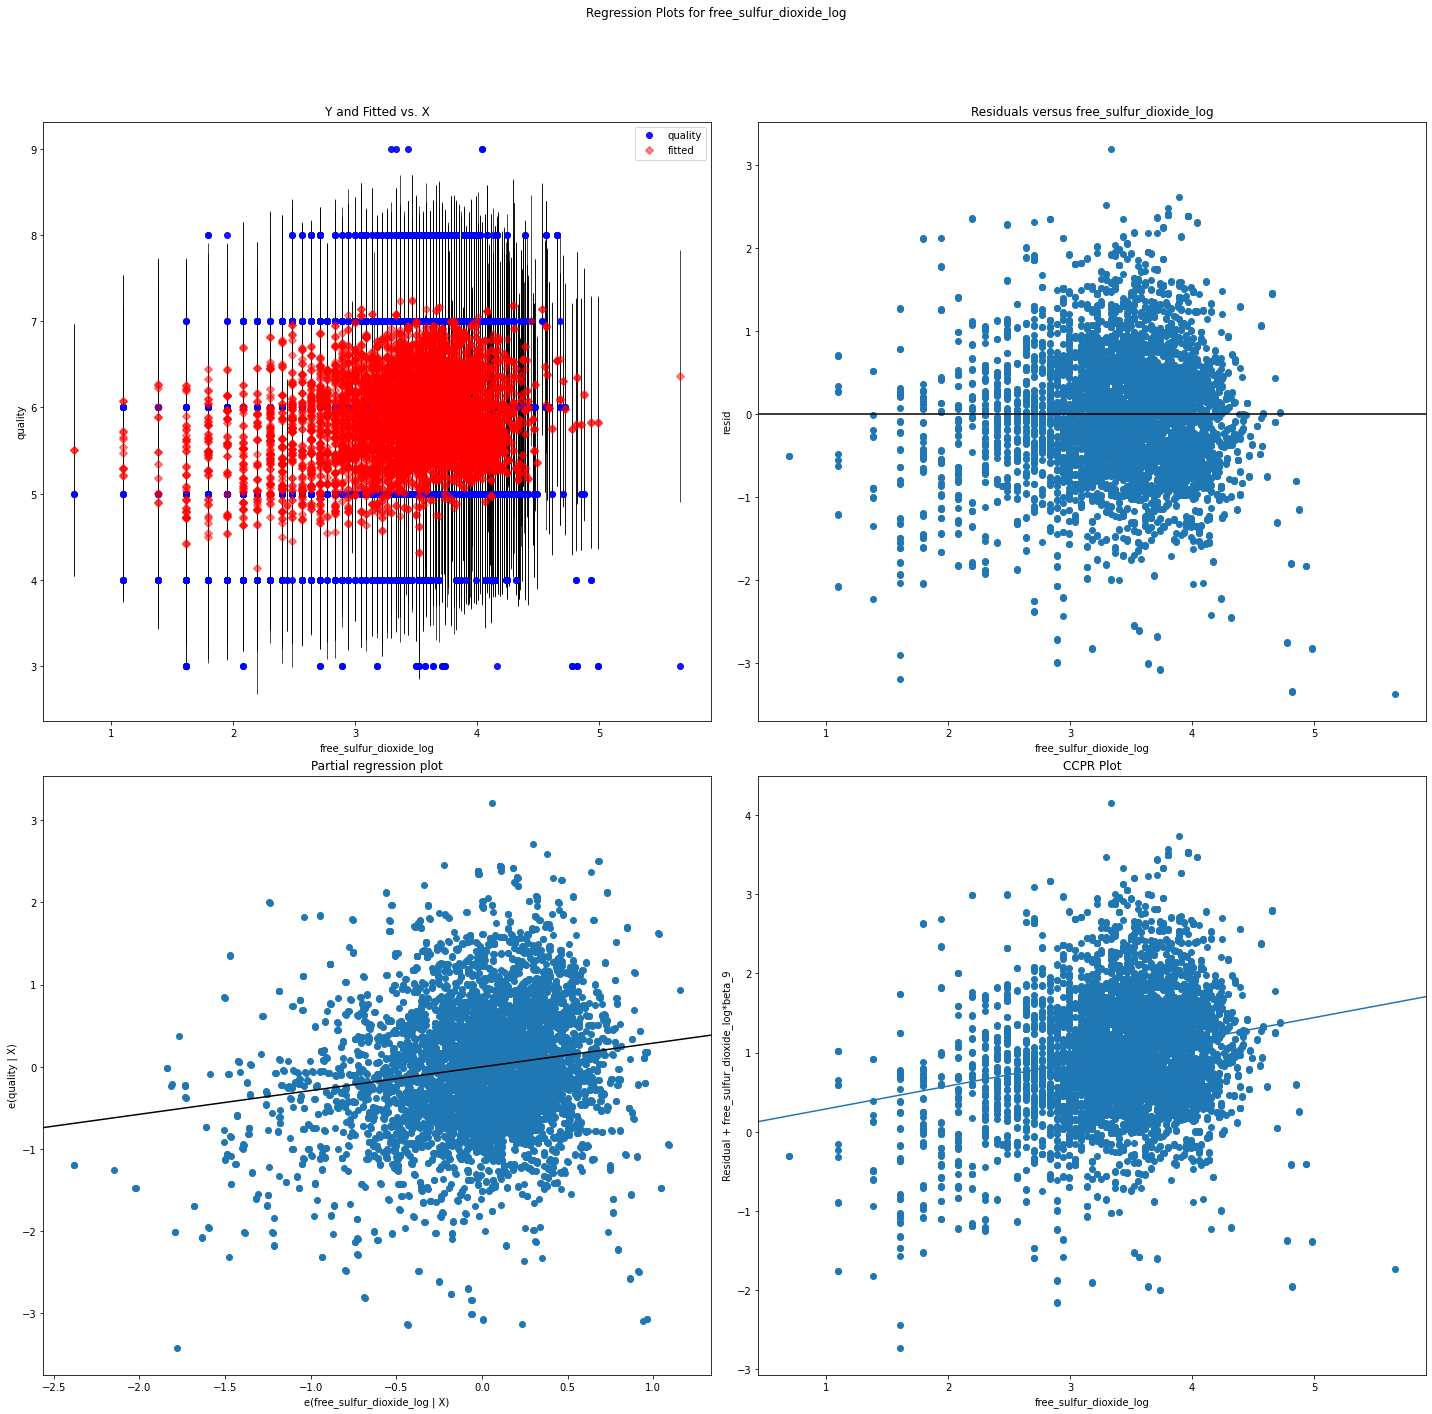

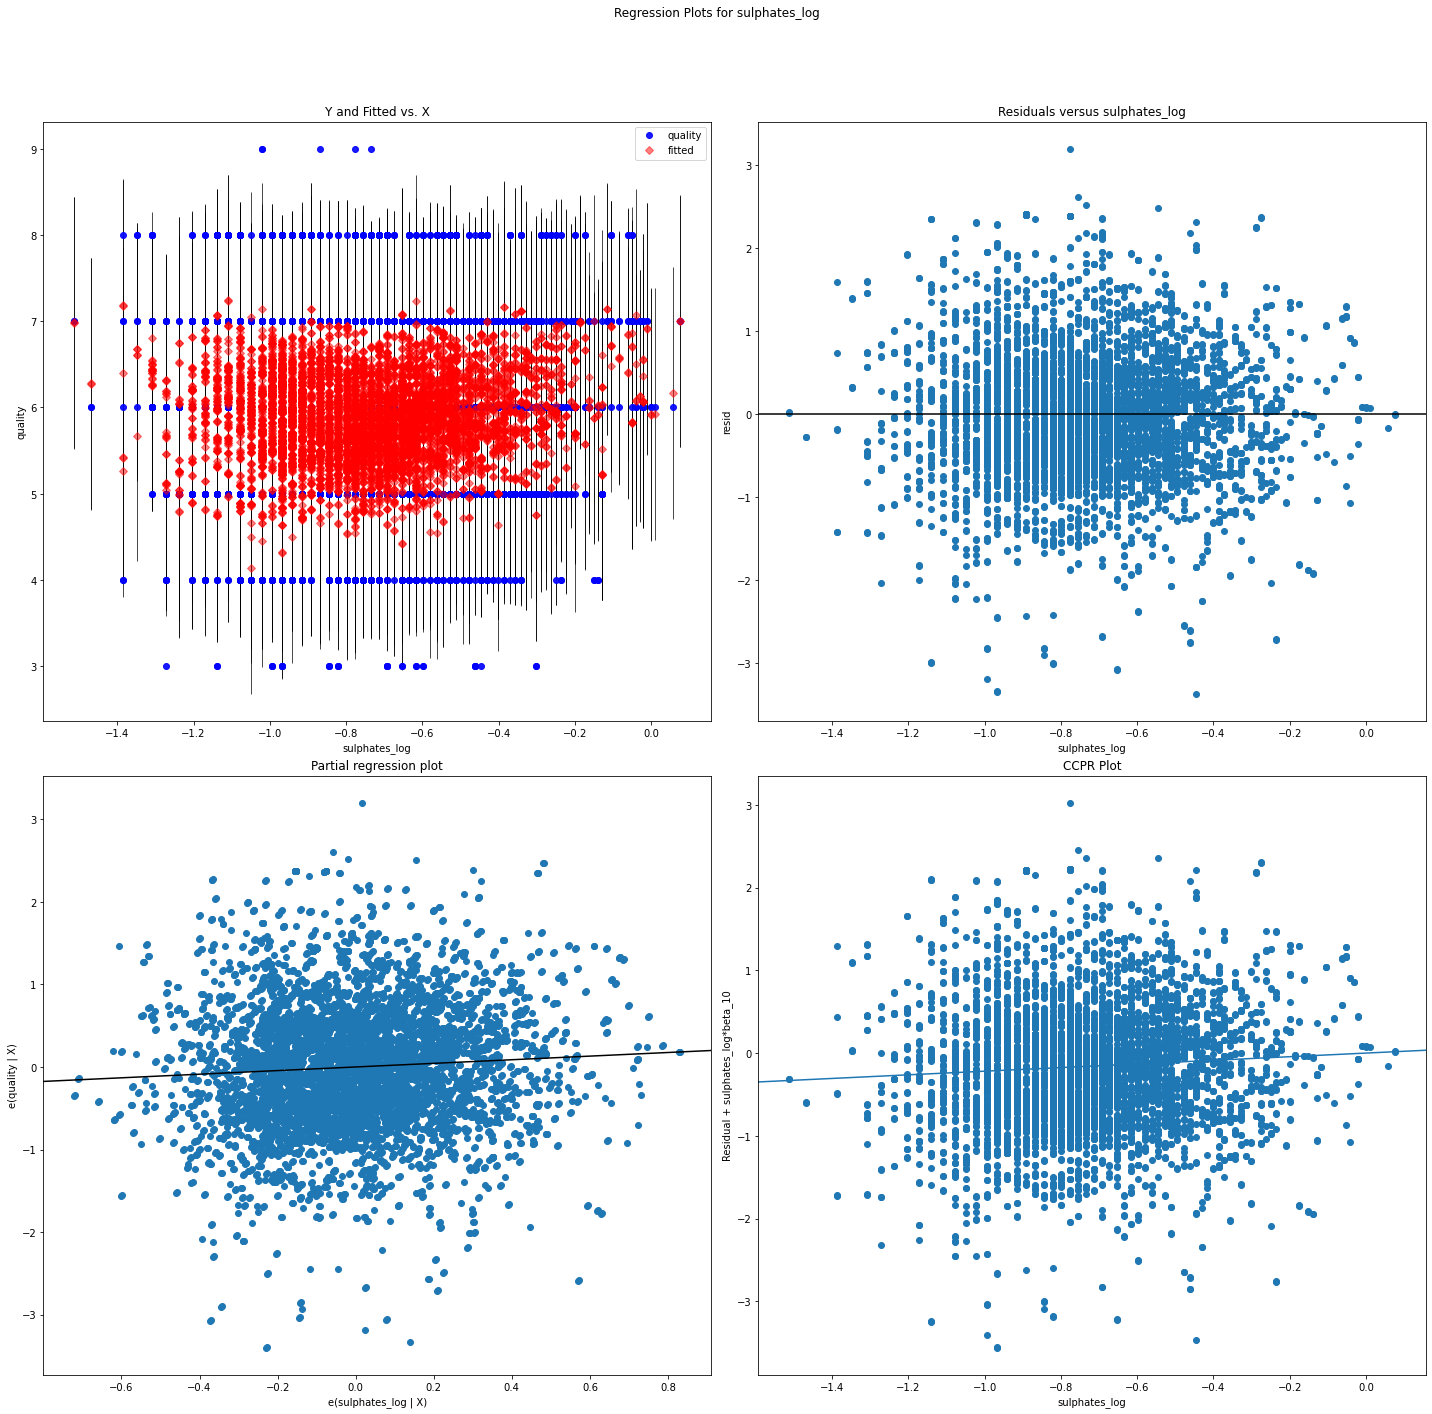

In [37]:
for column in data:
    fig = plt.figure(figsize=(20, 20))
    fig = sm.graphics.plot_regress_exog(model_5, column, fig=fig)

In [ ]:
import scipy.stats as stats
residuals = model_5.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)